In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/CodSoft/Task-5'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/CodSoft/Task-5\creditcard.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt# data visualization

In [5]:
#Exploratory data analysis

In [7]:
# Reading the dataset
df = pd.read_csv("D:/CodSoft/Task-5/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#Missing values in variables

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
#Explore class variable

In [14]:
fraud = df[df['Class'] == 1]
safe = df[df['Class'] == 0]
print('The number of fraud transactions are {}'.format(fraud.shape[0]))
print('The number of safe transactions are {}'.format(safe.shape[0]))

The number of fraud transactions are 492
The number of safe transactions are 284315


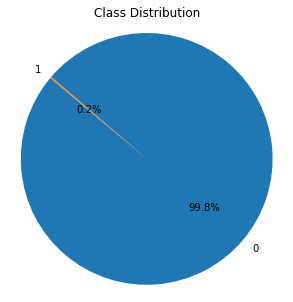

In [15]:
labels = df['Class'].value_counts().index
sizes = df['Class'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

In [16]:
#Search for any correlations

Text(0.5, 1.0, 'Correlation Matrix')

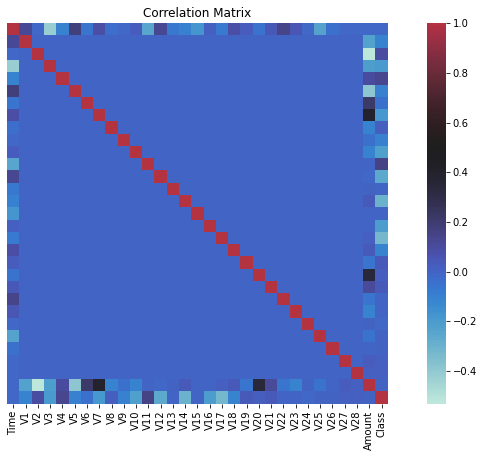

In [17]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(df.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

In [18]:
#Let's not balance and see the results.

In [19]:
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [20]:
#first we split data into separate training and test set

In [21]:
inputs = df.drop("Class", axis="columns")
targets = df.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

In [22]:
print("y test value counts:\n" ,y_test.value_counts(),"\n\n")
print("y train value counts:\n" ,y_train.value_counts())

y test value counts:
 0    56868
1       94
Name: Class, dtype: int64 


y train value counts:
 0    227447
1       398
Name: Class, dtype: int64


In [23]:
#then we fit the Logistic Regression model

In [24]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train,y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

0.9992977774656788


In [ ]:
#We got 99.9% accuracy without doing any balancing. Why is it then necessary to balance ? That will be answered by a confusion matrix.

In [25]:
#confusion matrix

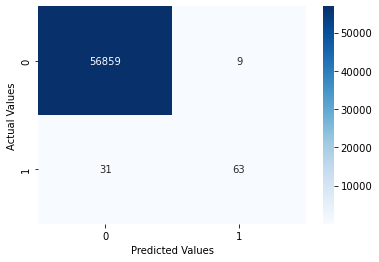

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [27]:
#handling imbalanced datasets

In [28]:
#1. Random Undersampling

In [29]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
245582,0.800327,0.041780,-3.678592,-2.185288,2.145642,-0.108133,5.326785,-3.320732,-4.715889,-0.676015,...,-1.528738,0.281099,-1.687634,-5.947433,0.991956,-0.871129,-0.674865,0.526634,0.318034,0
33921,-0.555129,-0.296793,1.289134,0.467212,-1.035215,0.348510,0.965128,0.162317,0.188477,0.053558,...,-0.051953,-0.147832,-0.362923,-0.230544,-1.427948,0.650917,0.465196,-0.022903,0.009328,0
18808,-0.645073,1.439251,0.824080,-1.197571,1.671425,0.999394,-1.540596,1.480644,-1.451232,0.713797,...,0.017694,0.162967,0.668738,-0.229503,-0.232408,0.256959,0.741650,0.042034,0.029245,0
52806,-0.458640,-0.028226,-0.763642,1.153200,0.845734,-0.287226,-0.005743,-0.137666,0.255488,0.578325,...,0.036340,-0.183093,-0.678964,-0.037631,-0.529925,-0.096189,0.108287,0.126774,0.039826,0
200909,0.575030,-0.167819,1.986009,-0.337558,-0.418934,0.369815,-0.360600,-0.012716,-0.588175,-0.005277,...,-0.113618,0.199920,0.863473,0.130956,0.660961,-0.034146,-0.240472,0.047897,-0.028392,0


In [30]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]

In [31]:
#Check how many frauds we got so that we can undersample legit transactions to that number.
print(legit_train.shape, fraud_train.shape)

(227447, 31) (398, 31)


In [32]:
legit_train = legit_train.sample(n=398)
legit_train.shape

(398, 31)

In [33]:
#Now that we have same number of fraud and legit transactions, let's join them back to recreate a complete balanced training dataset.
train_data = pd.concat([legit_train, fraud_train], axis=0)
train_data.shape

(796, 31)

In [37]:
#Let's separate features and targets from the new training dataset.
x_train_undersampled = train_data.drop('Class', axis='columns')
y_train_undersampled = train_data.Class

In [38]:
#We don't have to bother with the test dataset because it will stay the same. So, we will just fit the model with new x_train_new, y_train_new and old x_test, y_test.
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train_undersampled,y_train_undersampled)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.90      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

0.9716828763035006


In [39]:
#We got an accuracy of 97%. Not bad. Let's check the confusion matrix.

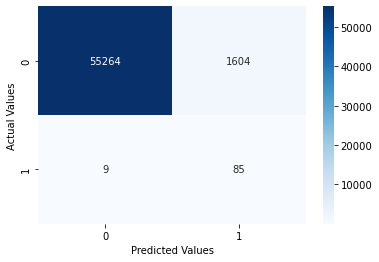

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [41]:
#2. Random Upsampling

In [42]:
#let's split the training dataset to legit and fraud datasets so we can upsample the fraud dataset
train_data = pd.concat([x_train, y_train], axis=1)

In [43]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]

In [44]:
# before oversamling
print(legit_train.shape, fraud_train.shape)

(227447, 31) (398, 31)


In [46]:
#To upsample the fraud training dataset we duplicate randomly this dataset and to do so we follow these steps:
#First we shuffle the fraud_train dataset to create a random order of rows.
#Repeat this shuffled dataset to meet the desired number of rows.
#If there's a remaining rows, slice the shuffled dataset to add the remaining rows.

In [47]:
shuffled_fraud_train = fraud_train.sample(frac=1, random_state=42)

In [48]:
duplications_needed = len(legit_train) // len(fraud_train)
remaining_rows = len(legit_train) % len(fraud_train)

In [49]:
duplicated_fraud_train = [shuffled_fraud_train] * duplications_needed
if remaining_rows > 0:
    duplicated_fraud_train.append(shuffled_fraud_train[:remaining_rows])

In [50]:
upsampled_fraud_train = pd.concat(duplicated_fraud_train, ignore_index=True)

In [51]:
#Now that we have our upsampled fraud dataset lets combine it with not fraud dataset

In [52]:
upsampled_train = pd.concat([legit_train, upsampled_fraud_train])

0    227447
1    227447
Name: Class, dtype: int64


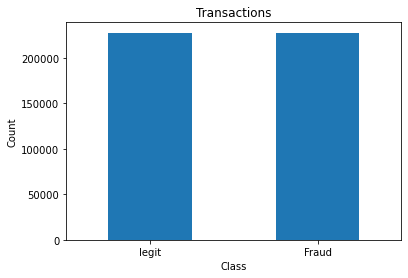

In [53]:
print(upsampled_train['Class'].value_counts())
plt.figure(figsize=(6, 4))

labels = ["legit", "Fraud"]
count_classes = upsampled_train.value_counts(upsampled_train['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [54]:
#we see now that we have a balanced dataset

In [55]:
x_train_ov = upsampled_train.drop("Class", axis="columns")
y_train_ov = upsampled_train.Class

In [56]:
lorg = LogisticRegression(max_iter = 10000)
lorg.fit(x_train_ov , y_train_ov)
y_pred_upsampled_model = lorg.predict(x_test)

print("accuracy = ",lorg.score(x_test , y_test))
print(classification_report(y_test,y_pred_upsampled_model))

accuracy =  0.9752291001018223
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.89      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [57]:
#we see that we got a very good accuracy but a litle bit increase of precision and recall compared to the random undersampling
#now let's see the confusion matrix

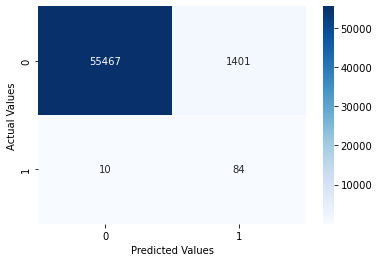

In [58]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_upsampled_model)

plt.figure(figsize=(6, 4))  
sns.heatmap(nn_cnf_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()